In [364]:
import pandas as pd
from sklearn.cluster import KMeans
import collections
import matplotlib.pyplot as plt
from matplotlib import colors
import pylab as pl
%matplotlib inline

In [365]:
#use your dataset location
data = pd.read_csv('UNdata_edu.csv')
data.head(5)

,Reference Area,Time Period,Sex,Age group,Units of measurement,Observation Value
0,Afghanistan,2014,Female,Not applicable,Percent,35.23734
1,Afghanistan,2014,Male,Not applicable,Percent,61.51051
2,Afghanistan,2014,All genders,Not applicable,Percent,48.75032
3,Afghanistan,2013,All genders,Not applicable,Percent,48.87529
4,Afghanistan,2013,Male,Not applicable,Percent,62.10465


In [366]:
data.columns = ['Country', 'Year','Gender','Age group','Units of measurement','Percentage']
data.head(7)


,Country,Year,Gender,Age group,Units of measurement,Percentage
0,Afghanistan,2014,Female,Not applicable,Percent,35.23734
1,Afghanistan,2014,Male,Not applicable,Percent,61.51051
2,Afghanistan,2014,All genders,Not applicable,Percent,48.75032
3,Afghanistan,2013,All genders,Not applicable,Percent,48.87529
4,Afghanistan,2013,Male,Not applicable,Percent,62.10465
5,Afghanistan,2013,Female,Not applicable,Percent,34.86011
6,Afghanistan,2007,Female,Not applicable,Percent,15.21353


In [367]:
#filtered_data.loc[filtered_data['Year'].isin([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])]
data = data.loc[data['Year'].isin([2014,2015,2013,2012,2011,2010,2009])]
#data.loc[data.Year == 2015]
#data.loc[2018]
data.head(27)

,Country,Year,Gender,Age group,Units of measurement,Percentage
0,Afghanistan,2014,Female,Not applicable,Percent,35.23734
1,Afghanistan,2014,Male,Not applicable,Percent,61.51051
2,Afghanistan,2014,All genders,Not applicable,Percent,48.75032
3,Afghanistan,2013,All genders,Not applicable,Percent,48.87529
4,Afghanistan,2013,Male,Not applicable,Percent,62.10465
5,Afghanistan,2013,Female,Not applicable,Percent,34.86011
12,Albania,2014,Female,Not applicable,Percent,84.51594
13,Albania,2014,Male,Not applicable,Percent,85.99655
14,Albania,2014,All genders,Not applicable,Percent,85.27821
15,Albania,2013,All genders,Not applicable,Percent,84.02378


In [368]:
# removing Id column - data cleansing
data = data.drop('Age group', axis=1)
data.head(5)


,Country,Year,Gender,Units of measurement,Percentage
0,Afghanistan,2014,Female,Percent,35.23734
1,Afghanistan,2014,Male,Percent,61.51051
2,Afghanistan,2014,All genders,Percent,48.75032
3,Afghanistan,2013,All genders,Percent,48.87529
4,Afghanistan,2013,Male,Percent,62.10465


In [369]:
data = data.drop('Units of measurement', axis=1)

In [370]:
data.head(5)

,Country,Year,Gender,Percentage
0,Afghanistan,2014,Female,35.23734
1,Afghanistan,2014,Male,61.51051
2,Afghanistan,2014,All genders,48.75032
3,Afghanistan,2013,All genders,48.87529
4,Afghanistan,2013,Male,62.10465


In [371]:
data.Gender = pd.Categorical(data.Gender)
data['Gender_code'] = data.Gender.cat.codes
data.keys()
data.head(7)

,Country,Year,Gender,Percentage,Gender_code
0,Afghanistan,2014,Female,35.23734,1
1,Afghanistan,2014,Male,61.51051,2
2,Afghanistan,2014,All genders,48.75032,0
3,Afghanistan,2013,All genders,48.87529,0
4,Afghanistan,2013,Male,62.10465,2
5,Afghanistan,2013,Female,34.86011,1
12,Albania,2014,Female,84.51594,1


In [392]:
data.Country = pd.Categorical(data.Country)
data['Country_code'] = data.Country.cat.codes
data.keys()
data.head(10)

,Country,Year,Gender,Percentage,Gender_code,Country_code
0,Afghanistan,2014,Female,35.23734,1,0
1,Afghanistan,2014,Male,61.51051,2,0
2,Afghanistan,2014,All genders,48.75032,0,0
3,Afghanistan,2013,All genders,48.87529,0,0
4,Afghanistan,2013,Male,62.10465,2,0
5,Afghanistan,2013,Female,34.86011,1,0
12,Albania,2014,Female,84.51594,1,1
13,Albania,2014,Male,85.99655,2,1
14,Albania,2014,All genders,85.27821,0,1
15,Albania,2013,All genders,84.02378,0,1


In [393]:
columns = ['Country_code','Year', 'Percentage','Gender_code']
filtered_data = data[columns]
filtered_data.head(5)

,Country_code,Year,Percentage,Gender_code
0,0,2014,35.23734,1
1,0,2014,61.51051,2
2,0,2014,48.75032,0
3,0,2013,48.87529,0
4,0,2013,62.10465,2


0
1
2


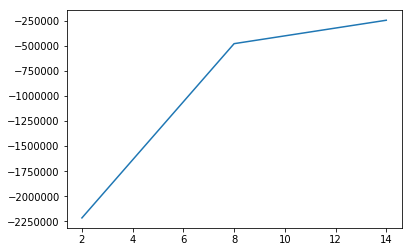

In [394]:
def optimal_clusters(df):
    Nc = range(2, 20, 6)
    data_km = df.values
    kmeans = [KMeans(n_clusters=i) for i in Nc]
    score = []
    for i in range(len(kmeans)):
        print(i)
        score.append(kmeans[i].fit(data_km).score(data_km))
    return Nc, score
#Nc, score = optimal_clusters(df_kmeans)
Nc, score = optimal_clusters(filtered_data)
pl.plot(Nc,score)

In [395]:
# def do_kmeans(X, num_cluster):
#     model = KMeans(n_clusters=num_cluster)
#     model.fit(X)
#     return model
#     kmeans_model = do_kmeans(filtered_data, 4)
kmeans_model= KMeans(n_clusters=8)
kmeans_model.fit(filtered_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [396]:
data_label = kmeans_model.predict(filtered_data)
collections.Counter(data_label)

Counter({4: 144, 0: 238, 6: 261, 2: 278, 7: 304, 5: 209, 3: 464, 1: 94})

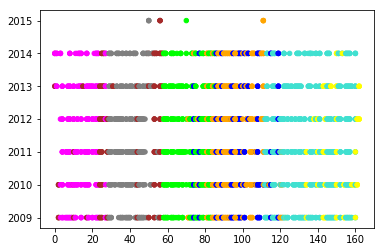

In [397]:
from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), 'lime','Turquoise','brown','blue','grey','orange']
plt.scatter(filtered_data.iloc[:, 0], filtered_data.iloc[:, 1], c=data_label, s=20, cmap=colors.ListedColormap(color_map))
#plt.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,1],s=200,marker='*',c='red',label='centroids')
plt.show()

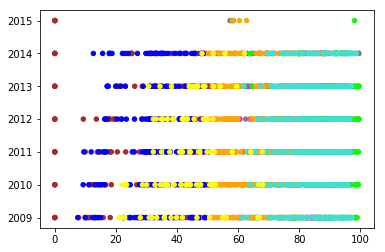

In [398]:
#figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
color_map=['magenta', 'yellow', 'lime','Turquoise','brown','blue','grey','orange']
plt.scatter(filtered_data.iloc[:, 2], filtered_data.iloc[:, 1], c=data_label, s=20, cmap=colors.ListedColormap(color_map))
#plt.scatter(kmeans_model.cluster_centers_[:,2],kmeans_model.cluster_centers_[:,1],s=200,marker='*',c='red',label='centroids')
plt.show()

### Plotting Country_code and Percentage

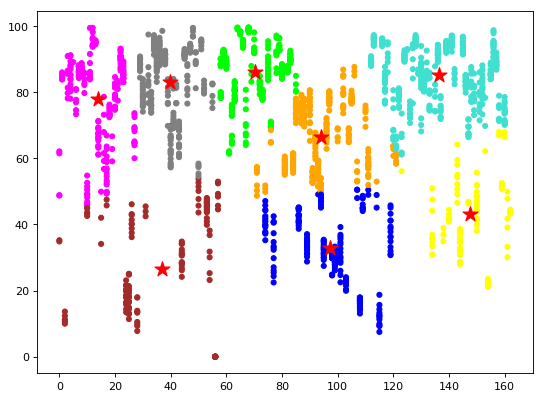

In [421]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
color_map=['magenta', 'yellow', 'lime','Turquoise','brown','blue','grey','orange']
plt.scatter(filtered_data.iloc[:, 0], filtered_data.iloc[:, 2], c=data_label, s=20, cmap=colors.ListedColormap(color_map))
plt.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,2],s=200,marker='*',c='red',label='centroids')
plt.show()

In [420]:
# #figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# color_map=['magenta', 'yellow', 'lime','Turquoise','brown','blue','grey','orange']
# plt.scatter(filtered_data.iloc[:, 3], filtered_data.iloc[:, 2], c=data_label, s=20, cmap=colors.ListedColormap(color_map))
# #plt.scatter(kmeans_model.cluster_centers_[:,3],kmeans_model.cluster_centers_[:,2],s=200,marker='*',c='red',label='centroids')
# plt.xlim(0,2)
# plt.show()

In [400]:

#Silhouette score to determine number of possible clusters#Silhoue 

from sklearn import metrics
score = metrics.silhouette_score(filtered_data, data_label )
score

0.41603341546170364

C:\Users\Vidya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


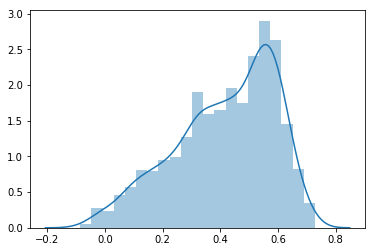

In [401]:
scores = metrics.silhouette_samples(filtered_data, data_label)
sns.distplot(scores);

In [402]:

# import seaborn as sns
# sns.FacetGrid(data, hue="Gender_code", size=12) \
#    .map(plt.scatter, "Year", "Percentage") \
#    .add_legend();

In [403]:
# import seaborn as sns
# sns.FacetGrid(data, hue="Country_code", size=8) \
#    .map(plt.scatter, "Year", "Percentage") \
#    .add_legend();

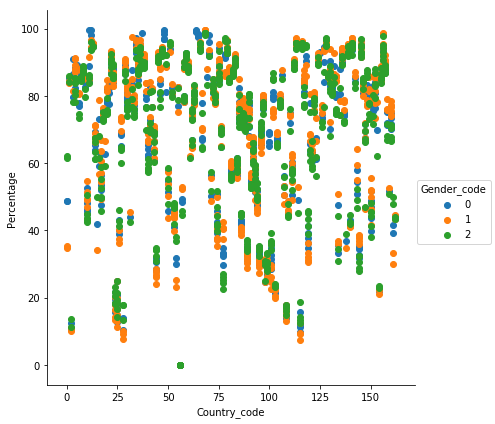

In [419]:
import seaborn as sns
sns.FacetGrid(data, hue="Gender_code", size=6) \
   .map(plt.scatter, "Country_code", "Percentage") \
   .add_legend();

In [405]:
#Gaussian Mixture Model (GMM) Clustering

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
gmm.fit(filtered_data)

# predict the cluster for each data point
data_model_gmm = gmm.predict(filtered_data)
data_model_gmm

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

In [406]:

from  matplotlib.patches import Ellipse
import numpy as np
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
        
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [407]:
from  sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=8,covariance_type='full',verbose=1,verbose_interval=10,max_iter=5000).fit(filtered_data.values)
labels = gmm.predict(filtered_data.values)
labels

Initialization 0
  Iteration 0
  Iteration 10
Initialization converged: True


array([4, 4, 4, ..., 2, 2, 2], dtype=int64)

In [408]:
test_features = ['Year','Percentage']
X = data[test_features].values
X [:10]

array([[2014.     ,   35.23734],
       [2014.     ,   61.51051],
       [2014.     ,   48.75032],
       [2013.     ,   48.87529],
       [2013.     ,   62.10465],
       [2013.     ,   34.86011],
       [2014.     ,   84.51594],
       [2014.     ,   85.99655],
       [2014.     ,   85.27821],
       [2013.     ,   84.02378]])

In [409]:
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis');
# plt.xlim(2000,2020)
# plot_gmm(gmm,X)

In [410]:
test_features = ['Country_code','Percentage']
X = data[test_features].values
X [:10]

array([[ 0.     , 35.23734],
       [ 0.     , 61.51051],
       [ 0.     , 48.75032],
       [ 0.     , 48.87529],
       [ 0.     , 62.10465],
       [ 0.     , 34.86011],
       [ 1.     , 84.51594],
       [ 1.     , 85.99655],
       [ 1.     , 85.27821],
       [ 1.     , 84.02378]])

Initialization 0
  Iteration 0
  Iteration 10
Initialization converged: True


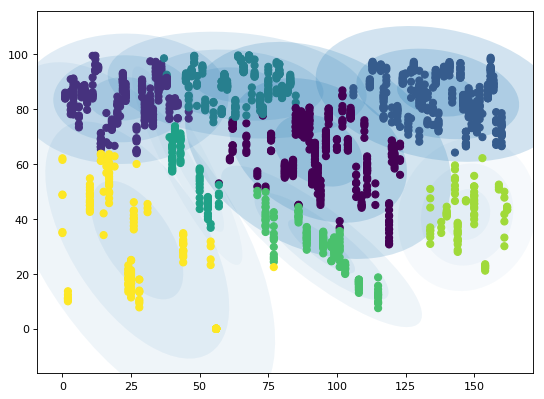

In [411]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis');
plot_gmm(gmm,X)

In [412]:
# test_features = ['Year','Country_code']
# X = data[test_features].values
# X [:10]

In [413]:
# figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
# plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis');
# plot_gmm(gmm,X)

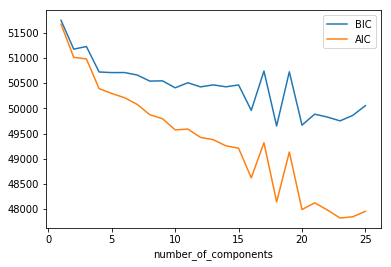

In [414]:

#BIC and AIC #BIC and  

gmm_models  = [GaussianMixture(n_components=i,covariance_type='full',max_iter=500).fit(filtered_data.values) for i in range(1,26)] 

n_components = [i for i in range(1,26)]
plt.plot(n_components, [m.bic(filtered_data.values) for m in gmm_models], label='BIC')
plt.plot(n_components, [m.aic(filtered_data.values) for m in gmm_models], label='AIC')
plt.legend(loc='best')
plt.xlabel('number_of_components');

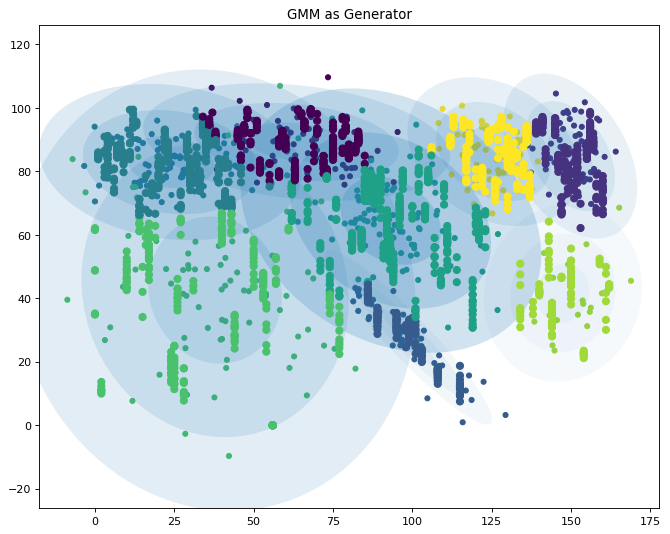

In [415]:
# Density Estimation
#density estimation using GMM as generator
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
gmm = GaussianMixture(n_components=8,covariance_type='full', random_state=0)
model = gmm.fit(filtered_data.values)
(genX, genY) = model.sample(500)
plt.scatter(genX[:,0], genX[:,2],c=genY,s=20,cmap='viridis')
test_features= ['Country_code','Percentage']
X = filtered_data[test_features].values
plot_gmm(gmm,X)
plt.title("GMM as Generator")
genX = genX[:,[0,2]]